In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import norm

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

Set up out properties

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-pac

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.5.3 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.10


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [4]:
#%matplotlib inline

Set scanpy out-files

In [5]:
writeDir = "write/"

fileName = "pdacMouseMrtx"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


Set figure parameters

In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

read input file

In [7]:
inDir = 'data/'
#inputFile = f'{inDir}/.txt'
#inMetaFile = f'{inDir}/.txt'

In [8]:
adata = sc.read_10x_h5(f"{inDir}matrix_BC1381_MRTX.h5", gex_only=False)
adata

reading data/matrix_BC1381_MRTX.h5
 (0:00:01)


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 11986 × 32297
    var: 'gene_ids', 'feature_types', 'genome'

In [9]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [10]:
adata.var

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,mouse_withref
Gm1992,ENSMUSG00000089699,Gene Expression,mouse_withref
Gm19938,ENSMUSG00000102331,Gene Expression,mouse_withref
Gm37381,ENSMUSG00000102343,Gene Expression,mouse_withref
Rp1,ENSMUSG00000025900,Gene Expression,mouse_withref
...,...,...,...
mScarlet,mScarlet,Gene Expression,mouse_withref
tdTomato,tdTomato,Gene Expression,mouse_withref
AK1661_MRTX_B0303,AK1661_MRTX_B0303,Antibody Capture,
AK1662_MRTX_B0304,AK1662_MRTX_B0304,Antibody Capture,


In [11]:
adata.X[:,-12:].todense()

matrix([[0.000e+00, 0.000e+00, 0.000e+00, ..., 3.700e+01, 8.400e+01,
         3.325e+03],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.200e+01, 8.600e+01,
         8.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.430e+02, 7.100e+01,
         8.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.570e+02, 8.000e+01,
         3.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.900e+01, 9.300e+01,
         8.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.800e+01, 4.800e+01,
         4.000e+00]], dtype=float32)

In [12]:
numGenes = 12

hto = adata[:,-12:]
adata = adata[:,:-12]
adata.obs = pd.DataFrame(hto.X.todense(), columns=hto.var_names, index=adata.obs.index)

In [15]:
adata.var

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,mouse_withref
Gm1992,ENSMUSG00000089699,Gene Expression,mouse_withref
Gm19938,ENSMUSG00000102331,Gene Expression,mouse_withref
Gm37381,ENSMUSG00000102343,Gene Expression,mouse_withref
Rp1,ENSMUSG00000025900,Gene Expression,mouse_withref
...,...,...,...
AC124606.1,ENSMUSG00000095523,Gene Expression,mouse_withref
AC133095.2,ENSMUSG00000095475,Gene Expression,mouse_withref
AC133095.1,ENSMUSG00000094855,Gene Expression,mouse_withref
AC234645.1,ENSMUSG00000095019,Gene Expression,mouse_withref


# Start QC
investigate highest expressed genes

normalizing counts per cell
    finished (0:00:00)


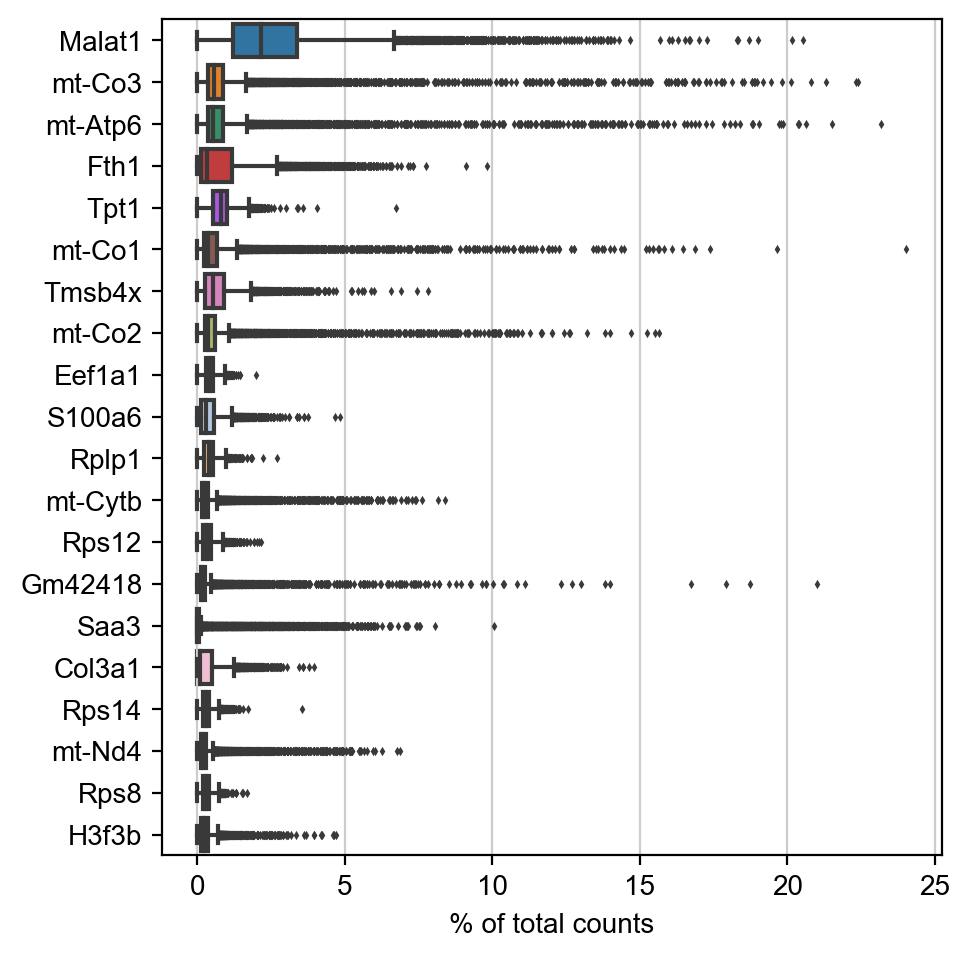

In [16]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/var/folders/nc/t9t85q_94q7g4tf0gz83qts40000gn/T/ipykernel_67620/3542297969.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


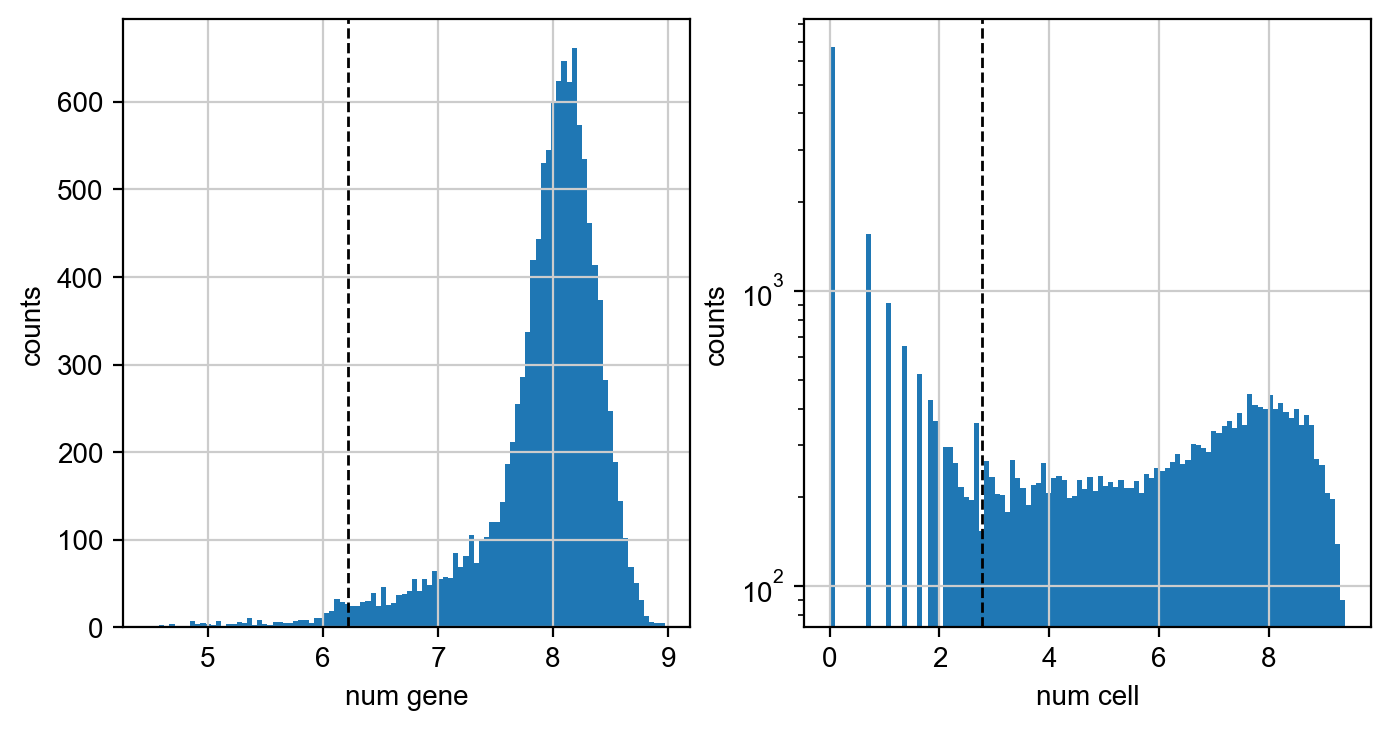

In [17]:
valX = adata.X>0
minGenes=500
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [18]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 278 cells that have less than 500 genes expressed
filtered out 12986 genes that are detected in less than 15 cells


In [19]:
adata = adata[:,np.logical_not(adata.var_names=="Malat1")]

## Mito QC

In [20]:
#for g in adata.var_names:
#    if "-" in g:
#        print(g)

In [21]:
adata.var['mt'] = adata.var_names.str.startswith('mt-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

/var/folders/nc/t9t85q_94q7g4tf0gz83qts40000gn/T/ipykernel_67620/3426326396.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('mt-')


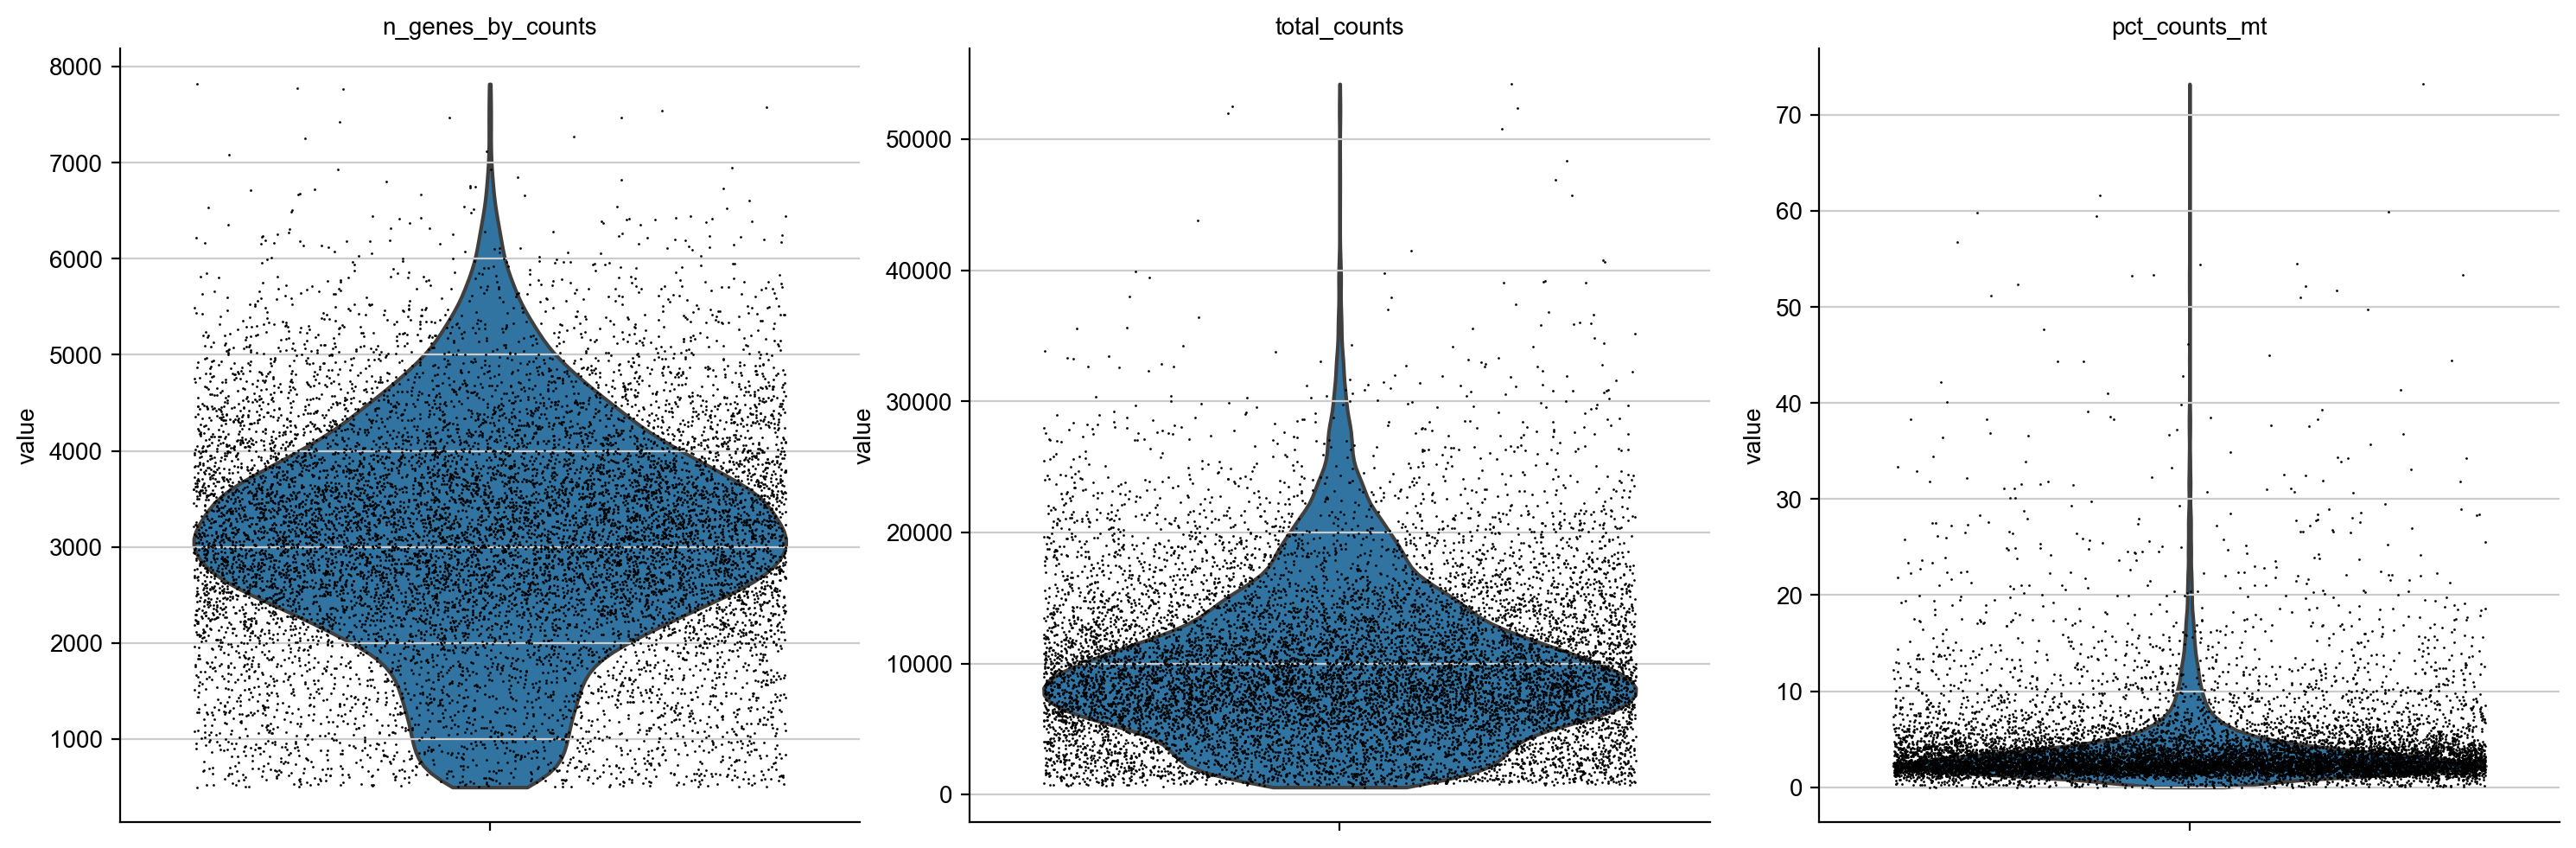

In [22]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

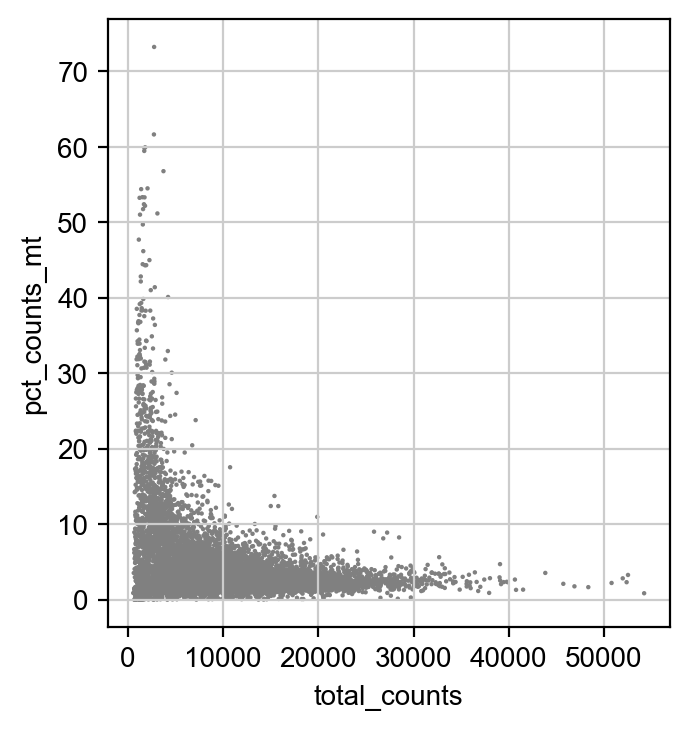

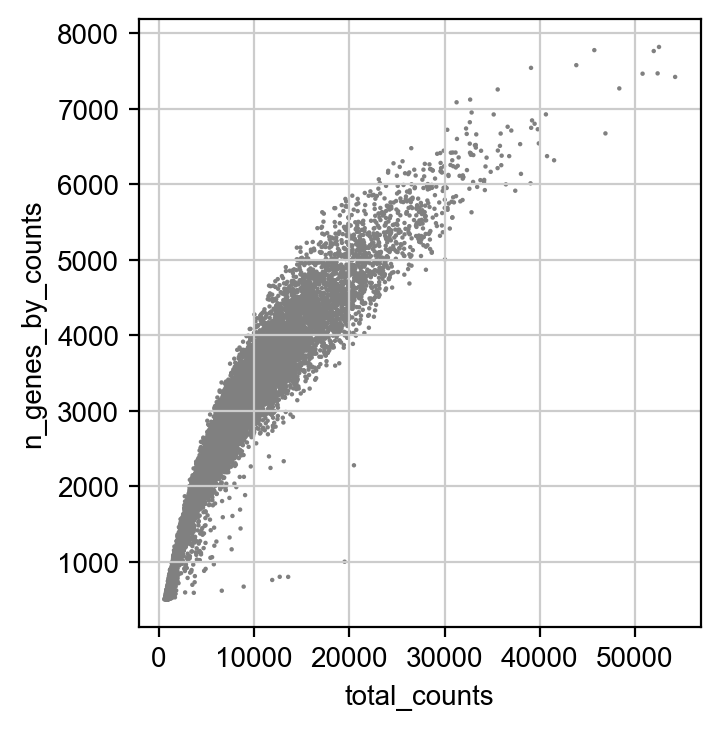

In [23]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [24]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.total_counts < 25000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

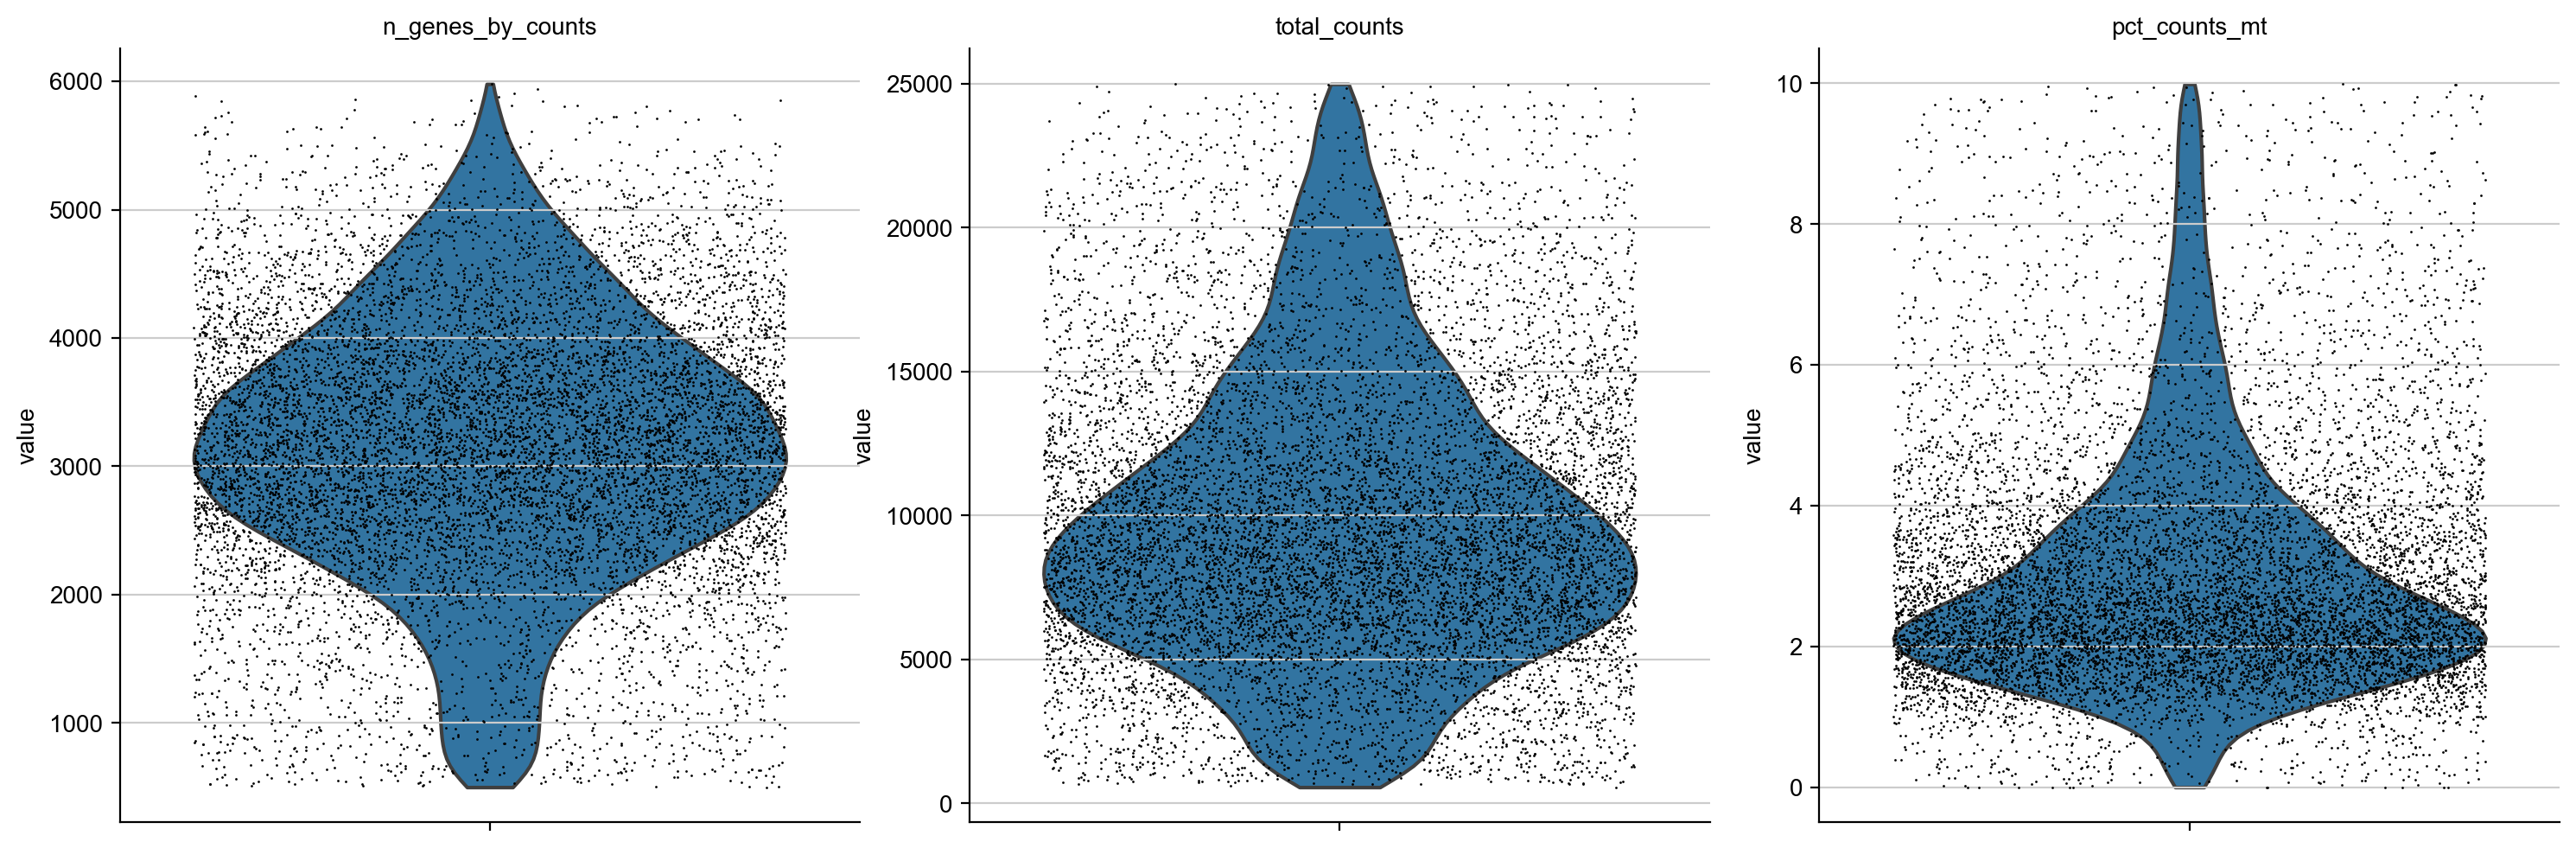

In [25]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

save post QC scanpy

# Perform Demultiplex Hashing

In [27]:
#perfrom Hashsolo anlaysis
hashNames = ['AK1661_MRTX_B0303', 'AK1662_MRTX_B0304','AK1664_MRTX_B0305']
sc.external.pp.hashsolo(adata, hashNames)#, priors=[0.01, 0.8, 0.19], number_of_noise_barcodes=None)
adata.obs.head()

Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/external/pp/_hashsolo.py:379: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["most_likely_hypothesis"] = results.loc[


,BFP,CLuc,CreER,DTR,EGFP,GLuc,luciferase,mScarlet,tdTomato,AK1661_MRTX_B0303,...,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification
AAACCCAAGAGGCGTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,...,41.649957,59.094815,127.0,1.818963,1,0,0.000006,0.808061,0.191933,AK1664_MRTX_B0305
AAACCCACACAAACGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,...,59.602649,87.984863,5.0,0.473037,1,0,0.001164,0.968480,0.030356,AK1662_MRTX_B0304
AAACCCACAGGTTTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,37.085714,54.761905,123.0,2.342857,1,0,0.000081,0.943617,0.056301,AK1662_MRTX_B0304
AAACCCACATAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,...,31.498906,47.866521,213.0,2.330416,1,0,0.000259,0.971943,0.027798,AK1662_MRTX_B0304
AAACCCACATCGAGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246.0,...,41.542751,60.585502,191.0,1.775093,1,0,0.003178,0.788062,0.208759,AK1661_MRTX_B0303


visualize hashes

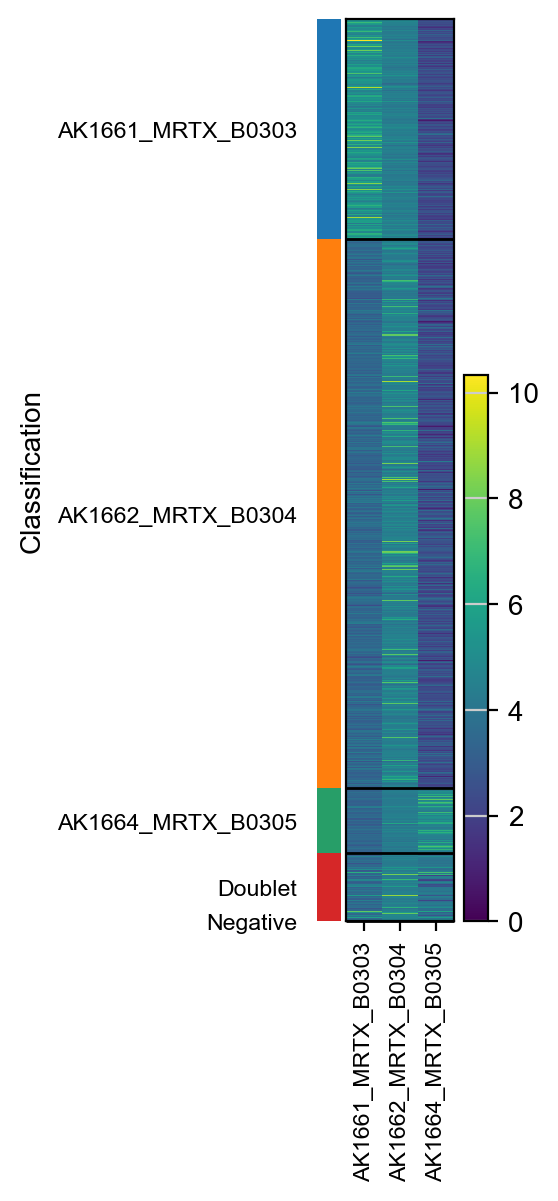

In [28]:
#output visulaization of hashing
sc.pl.heatmap(adata, hashNames, groupby="Classification", log=True, save = f"_{figName}_hash.png")

count each hash

In [29]:
from collections import Counter

Counter(adata.obs["Classification"])

Counter({'AK1664_MRTX_B0305': 763,
         'AK1662_MRTX_B0304': 6464,
         'AK1661_MRTX_B0303': 2596,
         'Doublet': 803,
         'Negative': 2})

In [30]:
hashCounts = adata.obs[hashNames]
hashCounts

,AK1661_MRTX_B0303,AK1662_MRTX_B0304,AK1664_MRTX_B0305
AAACCCAAGAGGCGTT-1,37.0,84.0,3325.0
AAACCCACACAAACGG-1,42.0,86.0,8.0
AAACCCACAGGTTTAC-1,14.0,59.0,24.0
AAACCCACATAGAGGC-1,41.0,109.0,5.0
AAACCCACATCGAGCC-1,246.0,96.0,12.0
...,...,...,...
TTTGTTGCAGACTGCC-1,36.0,79.0,246.0
TTTGTTGGTAACATCC-1,51.0,91.0,109.0
TTTGTTGGTTCAAGTC-1,158.0,94.0,8.0
TTTGTTGTCGGTCTAA-1,29.0,93.0,8.0


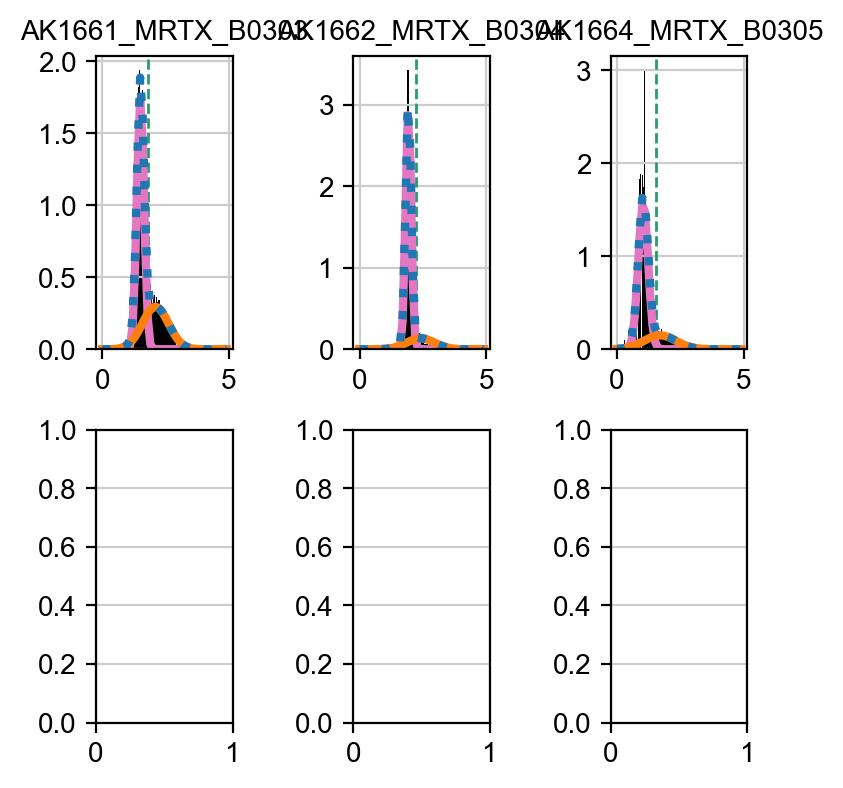

In [31]:
numHashes = len(hashNames)
plotLen = 3
fig, axs = plt.subplots(2,plotLen)
plt.rcParams["figure.figsize"] = (15,5)

dfHashBoundry = pd.DataFrame(np.zeros(numHashes),hashNames, columns=["boundry"])
gmm = GMM(n_components = 2, random_state=10, covariance_type = 'full', n_init=5, means_init=[[1],[4]])
#binEx = np.arange(0.5,10,10/200).reshape(-1,1)

for i, hashName in enumerate(hashNames):
    hashCount = np.array(np.log10(adata.obs[hashName]+1)).reshape(-1, 1)
    fitGMM = gmm.fit(hashCount)
    mean = fitGMM.means_  
    covs  = fitGMM.covariances_
    weights = fitGMM.weights_
    #print(mean)
    binEx = np.arange(min(mean),max(mean),0.1).reshape(-1,1)
    fitGmmBound = fitGMM.predict(binEx)
    #print(fitGmmBound)
    hashBoundry = binEx[np.where(fitGmmBound == 1)[0][0]][0]
    #naiveBoundry = np.log10(int(hashDisc.loc["90%",hashName])+1)
    
    dfHashBoundry.loc[hashName] = hashBoundry
    
    x_axis = np.arange(0, 5, 0.1)
    y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
    y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

    # Plot 2
    x,y = i//plotLen, i%plotLen
    axs[x,y].set_title(hashName)
    #axs[x,y].axvline(naiveBoundry, c='C3', linestyle='dashed', linewidth=1) #red
    axs[x,y].axvline(hashBoundry, c='C2', linestyle='dashed', linewidth=1)  #green
    axs[x,y].hist(hashCount, density=True, color='black', bins=100)        
    axs[x,y].plot(x_axis, y_axis0, lw=3, c='C6')                            #pink
    axs[x,y].plot(x_axis, y_axis1, lw=3, c='C1')                            #orange
    axs[x,y].plot(x_axis, y_axis0+y_axis1, lw=3, c='C0', ls=':')            #dotted blue
    
plt.tight_layout(pad=1.0)
plt.show()

In [32]:
hashIDs = hashCounts.copy()
hashID = np.array(hashNames)
for hashName in hashNames:
    print(hashName)
    print(dfHashBoundry.loc[hashName].values[0])
    hashIDs.loc[:,hashName] = np.log10(hashCounts.loc[:,hashName]+1) > dfHashBoundry.loc[hashName].values[0]
hashIDs

AK1661_MRTX_B0303
1.8101185191367926
AK1662_MRTX_B0304
2.2265042498302265
AK1664_MRTX_B0305
1.5348973430979063


,AK1661_MRTX_B0303,AK1662_MRTX_B0304,AK1664_MRTX_B0305
AAACCCAAGAGGCGTT-1,False,False,True
AAACCCACACAAACGG-1,False,False,False
AAACCCACAGGTTTAC-1,False,False,False
AAACCCACATAGAGGC-1,False,False,False
AAACCCACATCGAGCC-1,True,False,False
...,...,...,...
TTTGTTGCAGACTGCC-1,False,False,True
TTTGTTGGTAACATCC-1,False,False,True
TTTGTTGGTTCAAGTC-1,True,False,False
TTTGTTGTCGGTCTAA-1,False,False,False


In [33]:
classification = np.empty(len(adata), dtype="object")
i = 0
for cellBar, hashBool in hashIDs.iterrows():
    numHashes = sum(hashBool)
    if (numHashes == 1):
        classif = hashID[hashBool.values][0]#.values
    elif (numHashes > 1):
        classif = "Doublet"
    else:
        classif = "Negative"
    classification[i] = classif
    i = i + 1

In [34]:
adata.obs["GMM"] = classification
adata.obs["GMM"].value_counts()

Negative             4978
AK1661_MRTX_B0303    2838
AK1664_MRTX_B0305    1423
AK1662_MRTX_B0304    1007
Doublet               382
Name: GMM, dtype: int64

In [35]:
adata.obs[hashNames]

,AK1661_MRTX_B0303,AK1662_MRTX_B0304,AK1664_MRTX_B0305
AAACCCAAGAGGCGTT-1,37.0,84.0,3325.0
AAACCCACACAAACGG-1,42.0,86.0,8.0
AAACCCACAGGTTTAC-1,14.0,59.0,24.0
AAACCCACATAGAGGC-1,41.0,109.0,5.0
AAACCCACATCGAGCC-1,246.0,96.0,12.0
...,...,...,...
TTTGTTGCAGACTGCC-1,36.0,79.0,246.0
TTTGTTGGTAACATCC-1,51.0,91.0,109.0
TTTGTTGGTTCAAGTC-1,158.0,94.0,8.0
TTTGTTGTCGGTCTAA-1,29.0,93.0,8.0


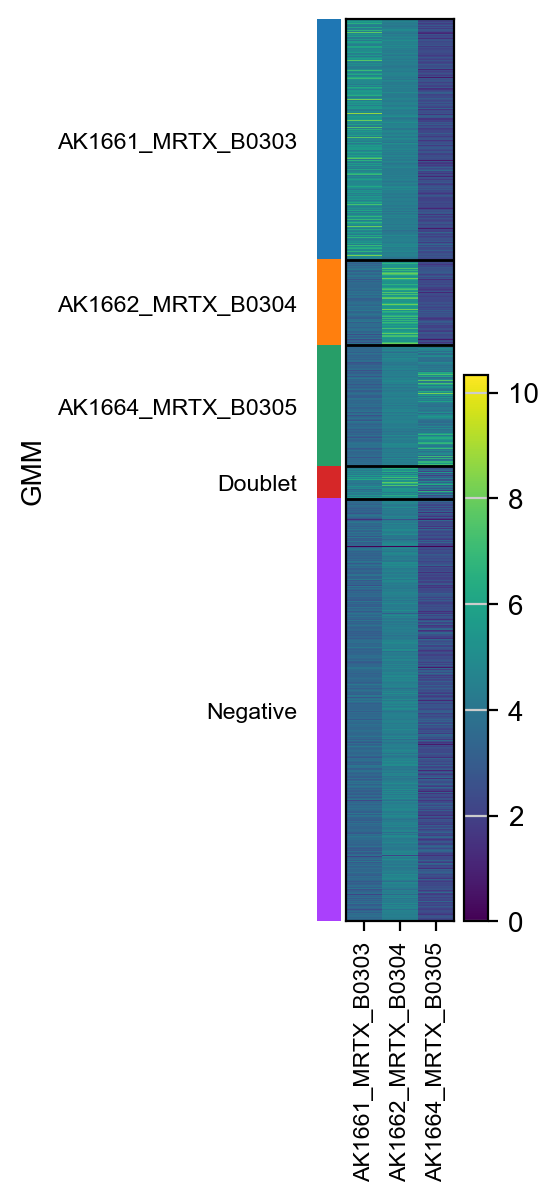

In [36]:
sc.pl.heatmap(adata, hashNames, groupby="GMM", log=True)#, save = f"_{figName}_hash.png")

In [37]:
adata1 = adata

In [38]:
adata = sc.read_10x_h5(f"{inDir}matrix_BC1381_veh.h5", gex_only=False)
adata

reading data/matrix_BC1381_veh.h5
 (0:00:00)


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 6476 × 32297
    var: 'gene_ids', 'feature_types', 'genome'

In [39]:
adata.var

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,mouse_withref
Gm1992,ENSMUSG00000089699,Gene Expression,mouse_withref
Gm19938,ENSMUSG00000102331,Gene Expression,mouse_withref
Gm37381,ENSMUSG00000102343,Gene Expression,mouse_withref
Rp1,ENSMUSG00000025900,Gene Expression,mouse_withref
...,...,...,...
mScarlet,mScarlet,Gene Expression,mouse_withref
tdTomato,tdTomato,Gene Expression,mouse_withref
AK1654_VEH_B0307,AK1654_VEH_B0307,Antibody Capture,
AK1656_VEH_B0308,AK1656_VEH_B0308,Antibody Capture,


In [40]:
adata.var[-13:]

,gene_ids,feature_types,genome
AC149090.1,ENSMUSG00000095041,Gene Expression,mouse_withref
BFP,BFP,Gene Expression,mouse_withref
CLuc,CLuc,Gene Expression,mouse_withref
CreER,CreER,Gene Expression,mouse_withref
DTR,DTR,Gene Expression,mouse_withref
EGFP,EGFP,Gene Expression,mouse_withref
GLuc,GLuc,Gene Expression,mouse_withref
luciferase,luciferase,Gene Expression,mouse_withref
mScarlet,mScarlet,Gene Expression,mouse_withref
tdTomato,tdTomato,Gene Expression,mouse_withref


In [41]:
numGenes = 12

hto = adata[:,-12:]
adata = adata[:,:-12]
adata.obs = pd.DataFrame(hto.X.todense(), columns=hto.var_names, index=adata.obs.index)

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [43]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [45]:
adata.var

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,mouse_withref
Gm1992,ENSMUSG00000089699,Gene Expression,mouse_withref
Gm19938,ENSMUSG00000102331,Gene Expression,mouse_withref
Gm37381,ENSMUSG00000102343,Gene Expression,mouse_withref
Rp1,ENSMUSG00000025900,Gene Expression,mouse_withref
...,...,...,...
AC124606.1,ENSMUSG00000095523,Gene Expression,mouse_withref
AC133095.2,ENSMUSG00000095475,Gene Expression,mouse_withref
AC133095.1,ENSMUSG00000094855,Gene Expression,mouse_withref
AC234645.1,ENSMUSG00000095019,Gene Expression,mouse_withref


# Start QC
investigate highest expressed genes

normalizing counts per cell
    finished (0:00:00)


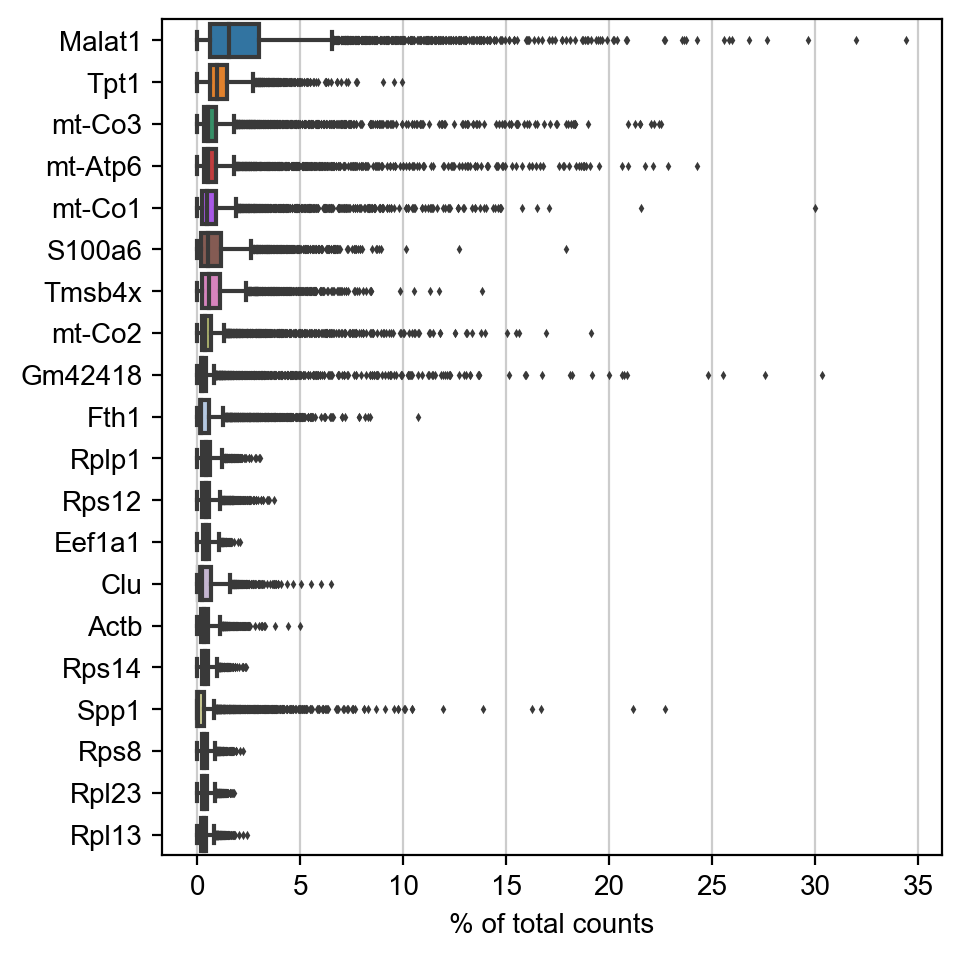

In [46]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/var/folders/nc/t9t85q_94q7g4tf0gz83qts40000gn/T/ipykernel_67620/3542297969.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


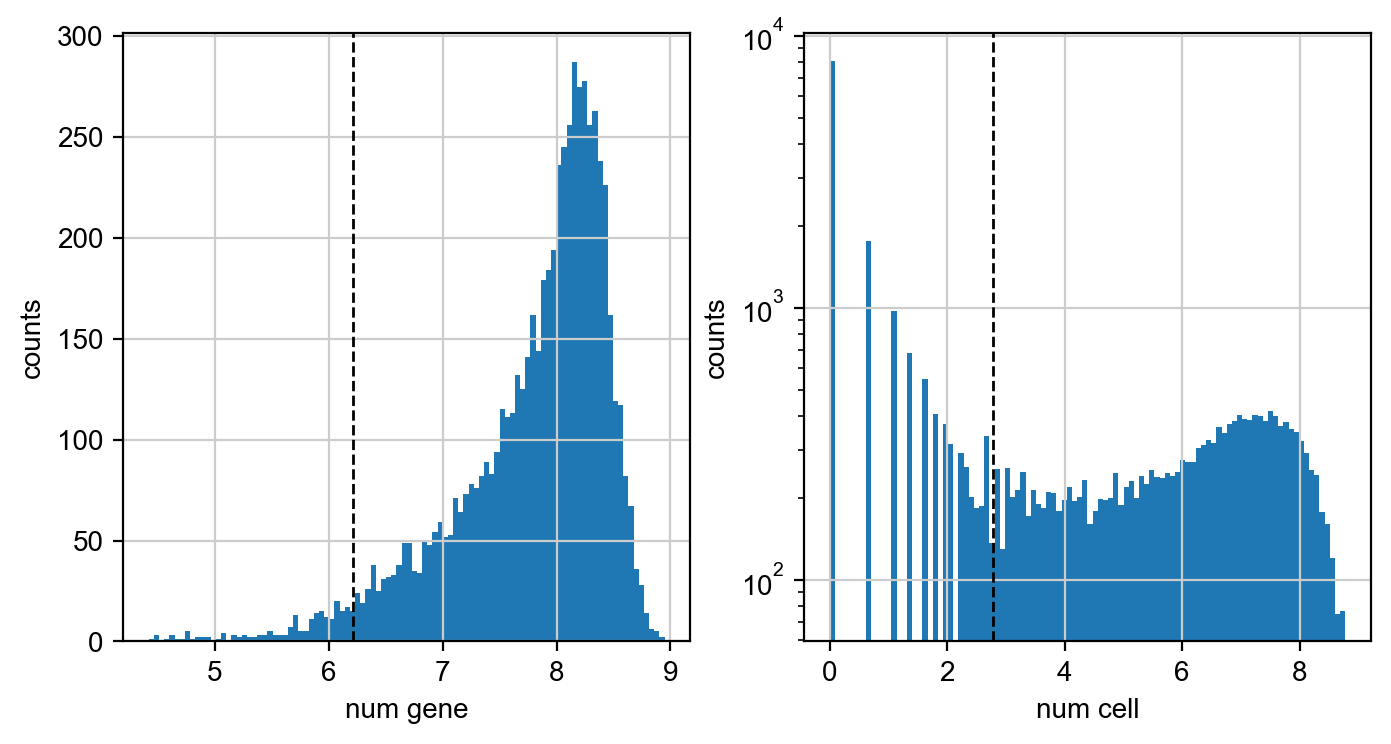

In [47]:
valX = adata.X>0
minGenes=500
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [48]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 213 cells that have less than 500 genes expressed
filtered out 14581 genes that are detected in less than 15 cells


In [49]:
adata = adata[:,np.logical_not(adata.var_names=="Malat1")]

## Mito QC

In [50]:
#for g in adata.var_names:
#    if "-" in g:
#        print(g)

In [51]:
adata.var['mt'] = adata.var_names.str.startswith('mt-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

/var/folders/nc/t9t85q_94q7g4tf0gz83qts40000gn/T/ipykernel_67620/3426326396.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('mt-')


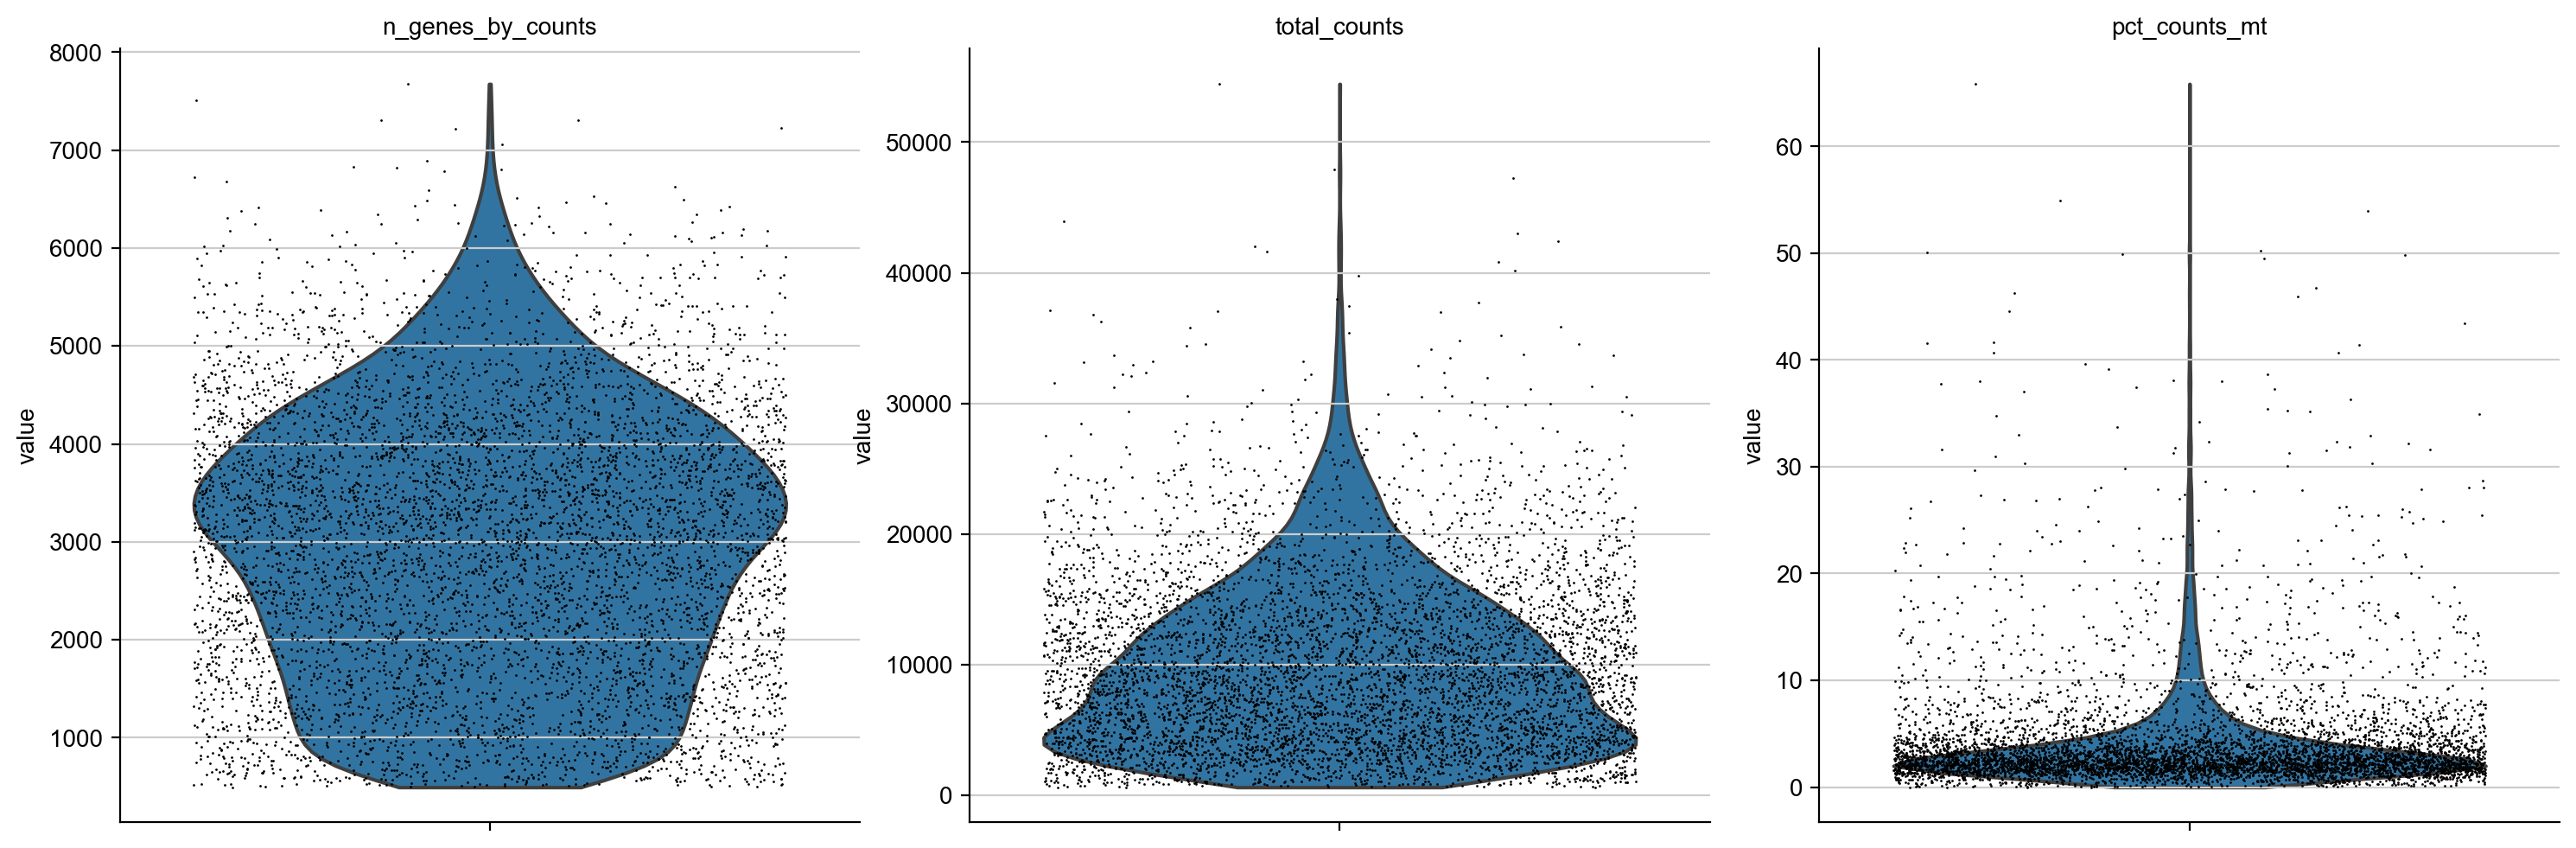

In [52]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

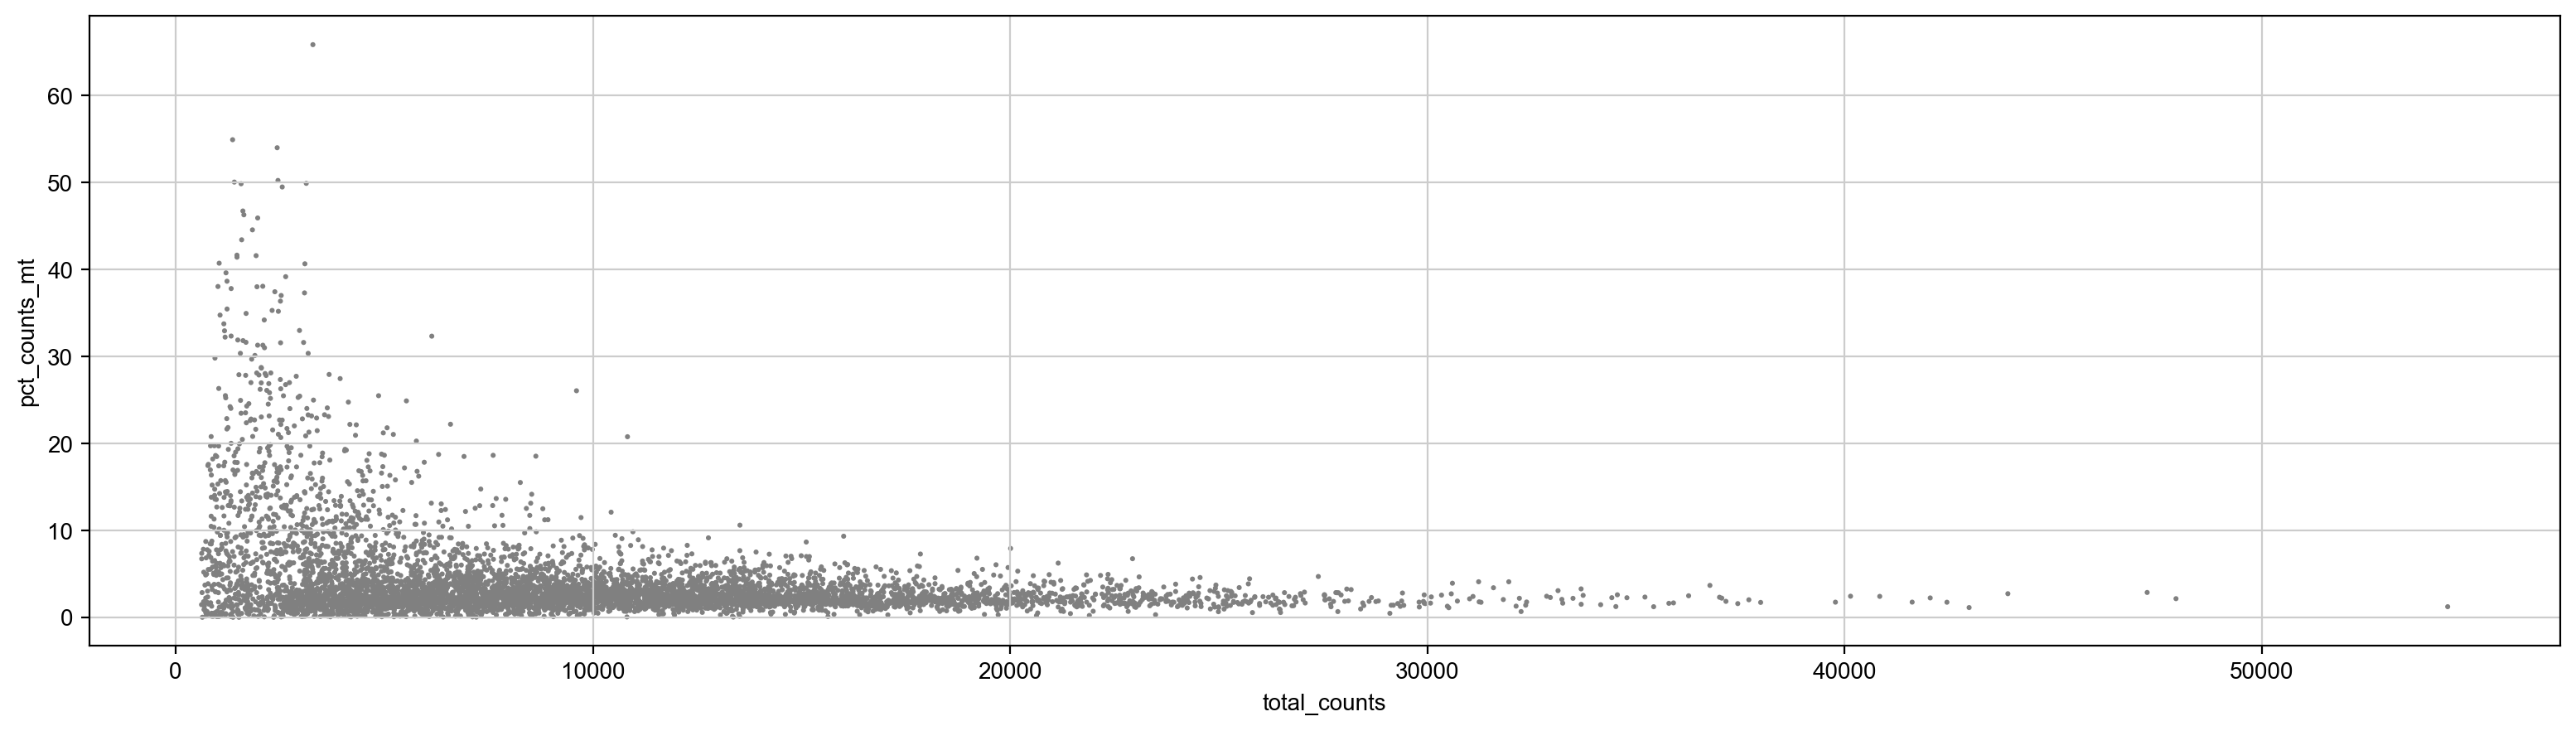

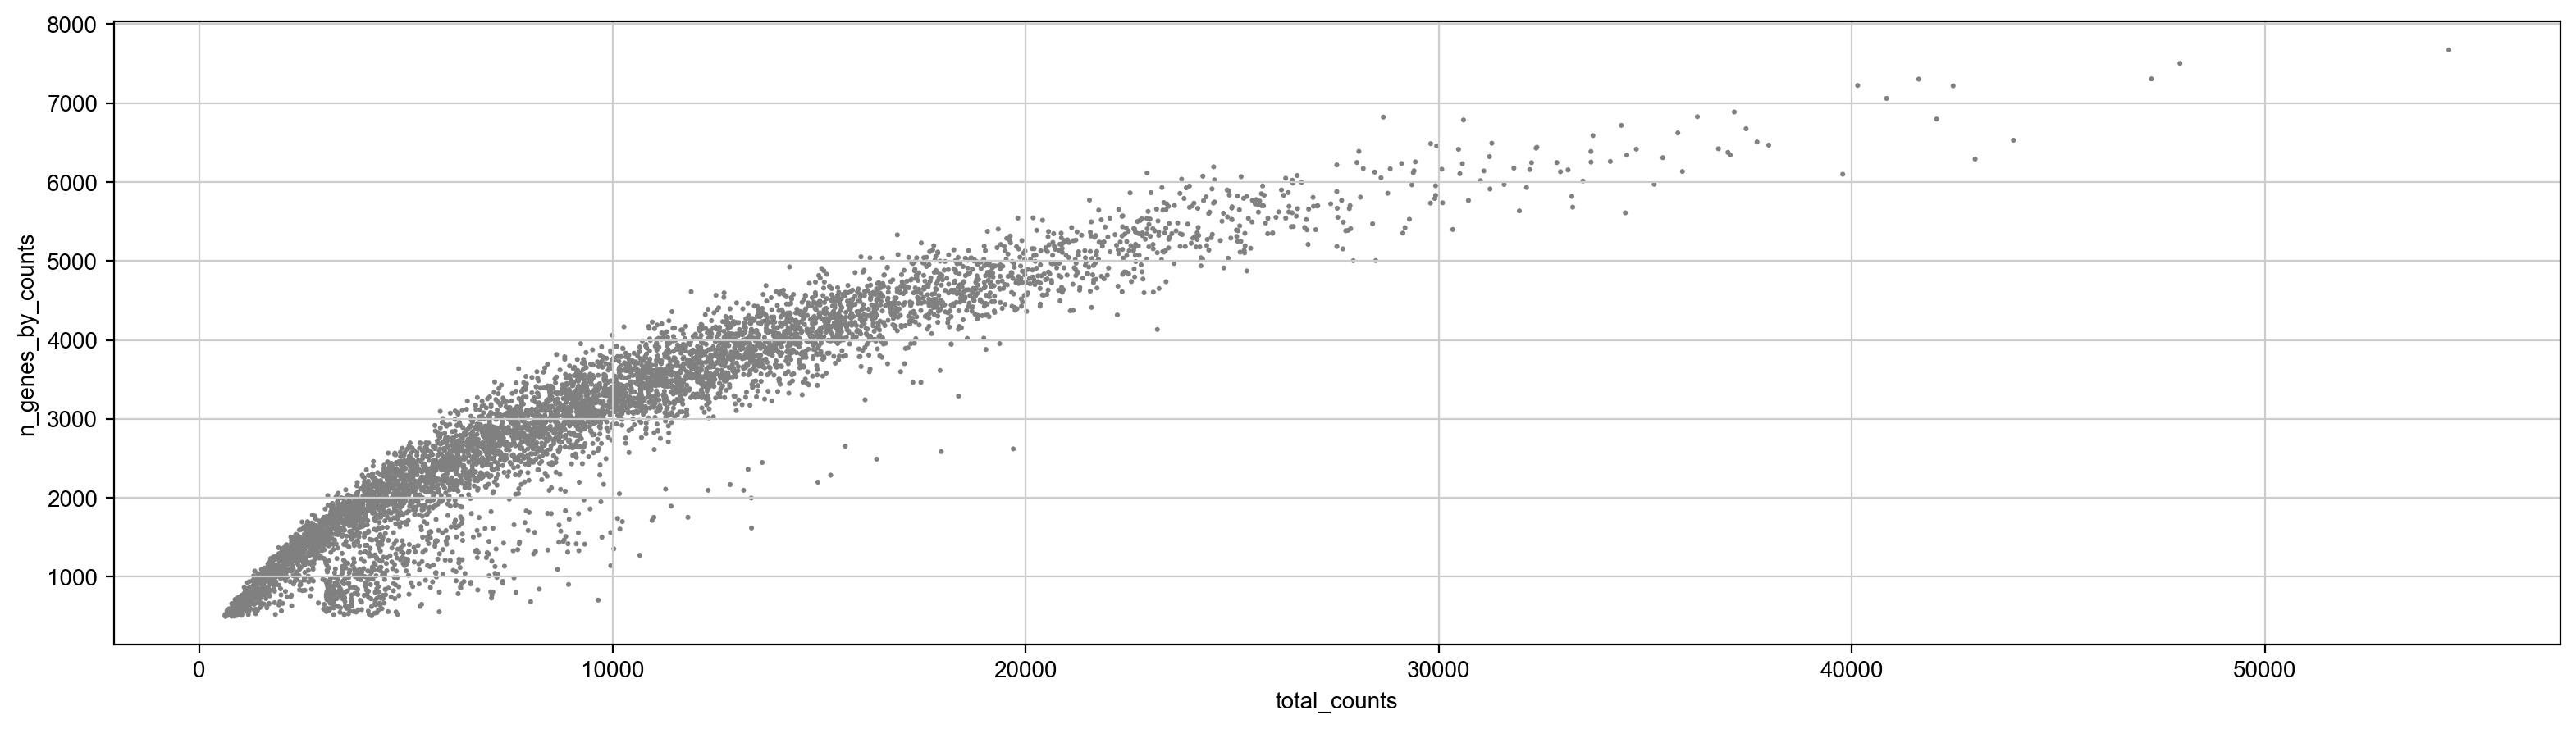

In [53]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [54]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.total_counts < 25000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

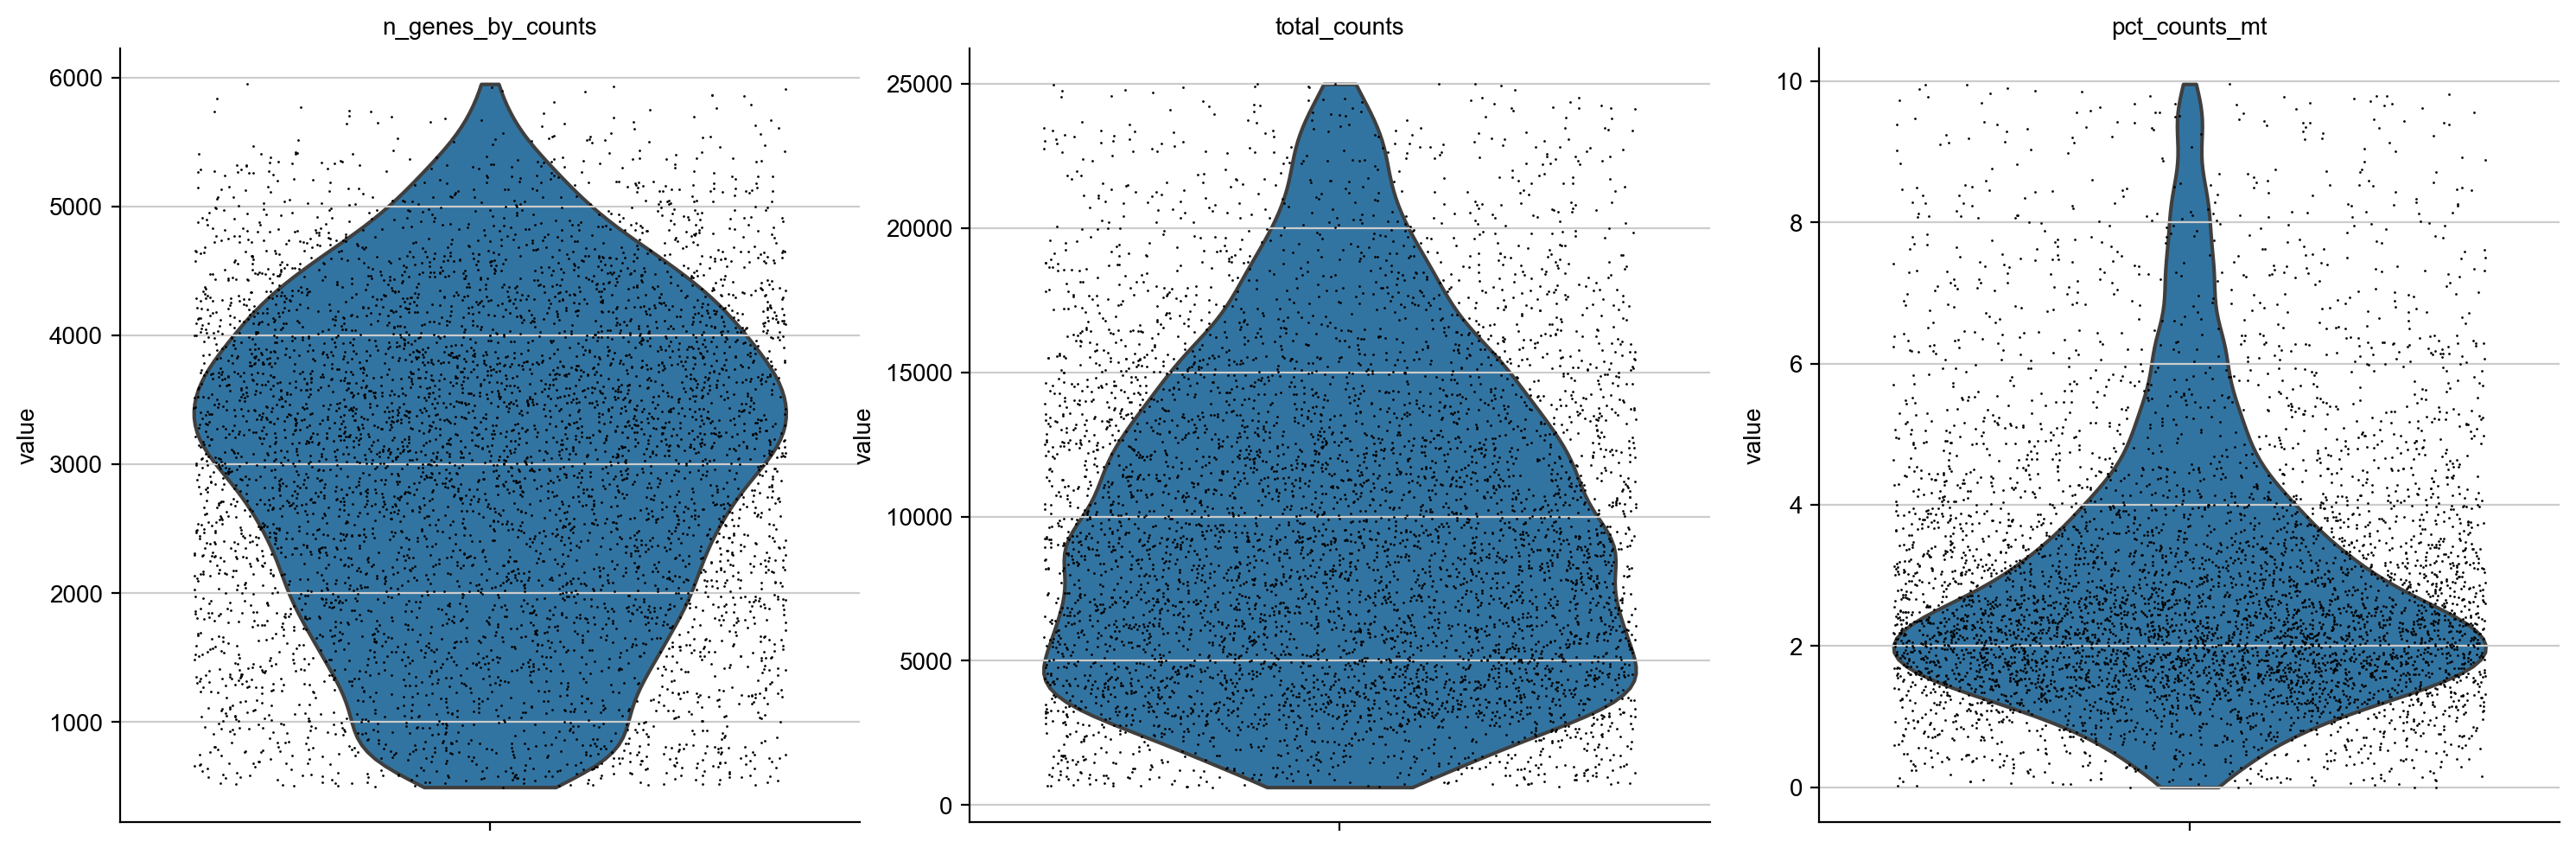

In [55]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

# Perform Demultiplex Hashing

In [57]:
#perfrom Hashsolo anlaysis
hashNames = ['AK1654_VEH_B0307', 'AK1656_VEH_B0308', 'AK1660_VEH_B0309']
sc.external.pp.hashsolo(adata, hashNames)#, priors=[0.01, 0.8, 0.19], number_of_noise_barcodes=None)
adata.obs.head()

Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/external/pp/_hashsolo.py:379: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["most_likely_hypothesis"] = results.loc[


,BFP,CLuc,CreER,DTR,EGFP,GLuc,luciferase,mScarlet,tdTomato,AK1654_VEH_B0307,...,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification
AAACCCAAGACCAACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,...,48.972759,62.293918,56.0,0.284077,1,0,0.009687,0.721478,0.268835,AK1660_VEH_B0309
AAACCCACAAGAGTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,...,41.733926,57.740093,321.0,2.911036,1,0,0.005546,0.933094,0.061359,AK1654_VEH_B0307
AAACCCACAGCTCATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,...,45.257714,59.197590,943.0,5.358868,1,0,0.008450,0.958409,0.033141,AK1654_VEH_B0307
AAACCCACATTGTGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,...,43.899752,58.640870,263.0,1.810796,1,0,0.000077,0.941829,0.058093,AK1654_VEH_B0307
AAACCCAGTCAGCGTC-1,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,13.0,57.0,...,44.779017,59.192714,571.0,2.841927,1,0,0.018754,0.756462,0.224783,AK1660_VEH_B0309


visualize hashes

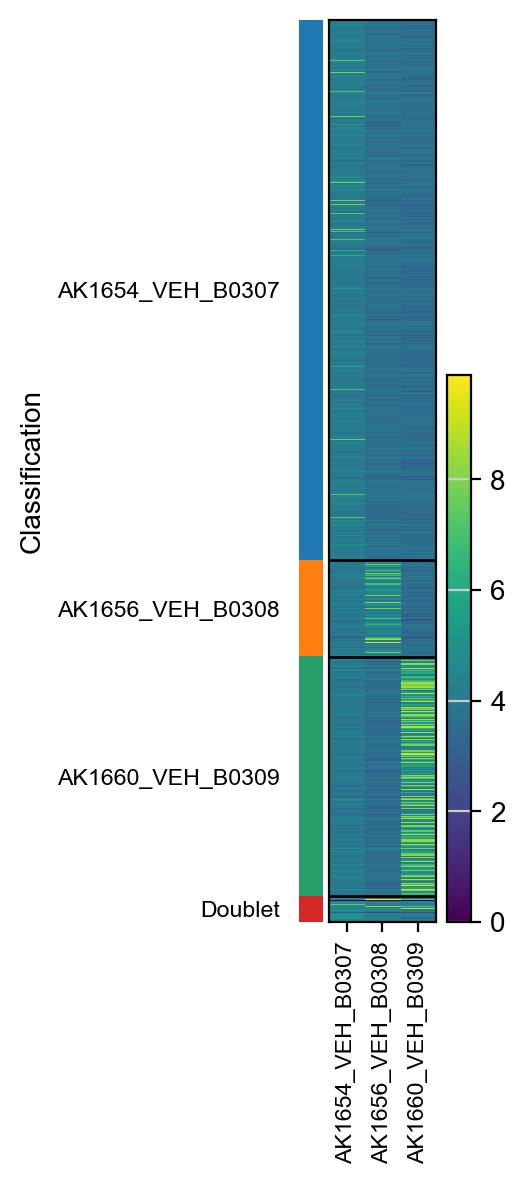

In [58]:
#output visulaization of hashing
sc.pl.heatmap(adata, hashNames, groupby="Classification", log=True, save = f"_{figName}_hash.png")

count each hash

In [59]:
from collections import Counter

Counter(adata.obs["Classification"])

Counter({'AK1660_VEH_B0309': 1487,
         'AK1654_VEH_B0307': 3364,
         'AK1656_VEH_B0308': 598,
         'Doublet': 163})

In [60]:
hashCounts = adata.obs[hashNames]
hashCounts

,AK1654_VEH_B0307,AK1656_VEH_B0308,AK1660_VEH_B0309
AAACCCAAGACCAACG-1,71.0,37.0,116.0
AAACCCACAAGAGTTA-1,58.0,46.0,33.0
AAACCCACAGCTCATA-1,51.0,38.0,45.0
AAACCCACATTGTGCA-1,86.0,41.0,50.0
AAACCCAGTCAGCGTC-1,57.0,41.0,86.0
...,...,...,...
TTTGTTGGTAACCAGG-1,46.0,32.0,394.0
TTTGTTGGTCATGACT-1,115.0,66.0,68.0
TTTGTTGGTTCCACAA-1,464.0,25.0,39.0
TTTGTTGTCGTAATGC-1,47.0,32.0,127.0


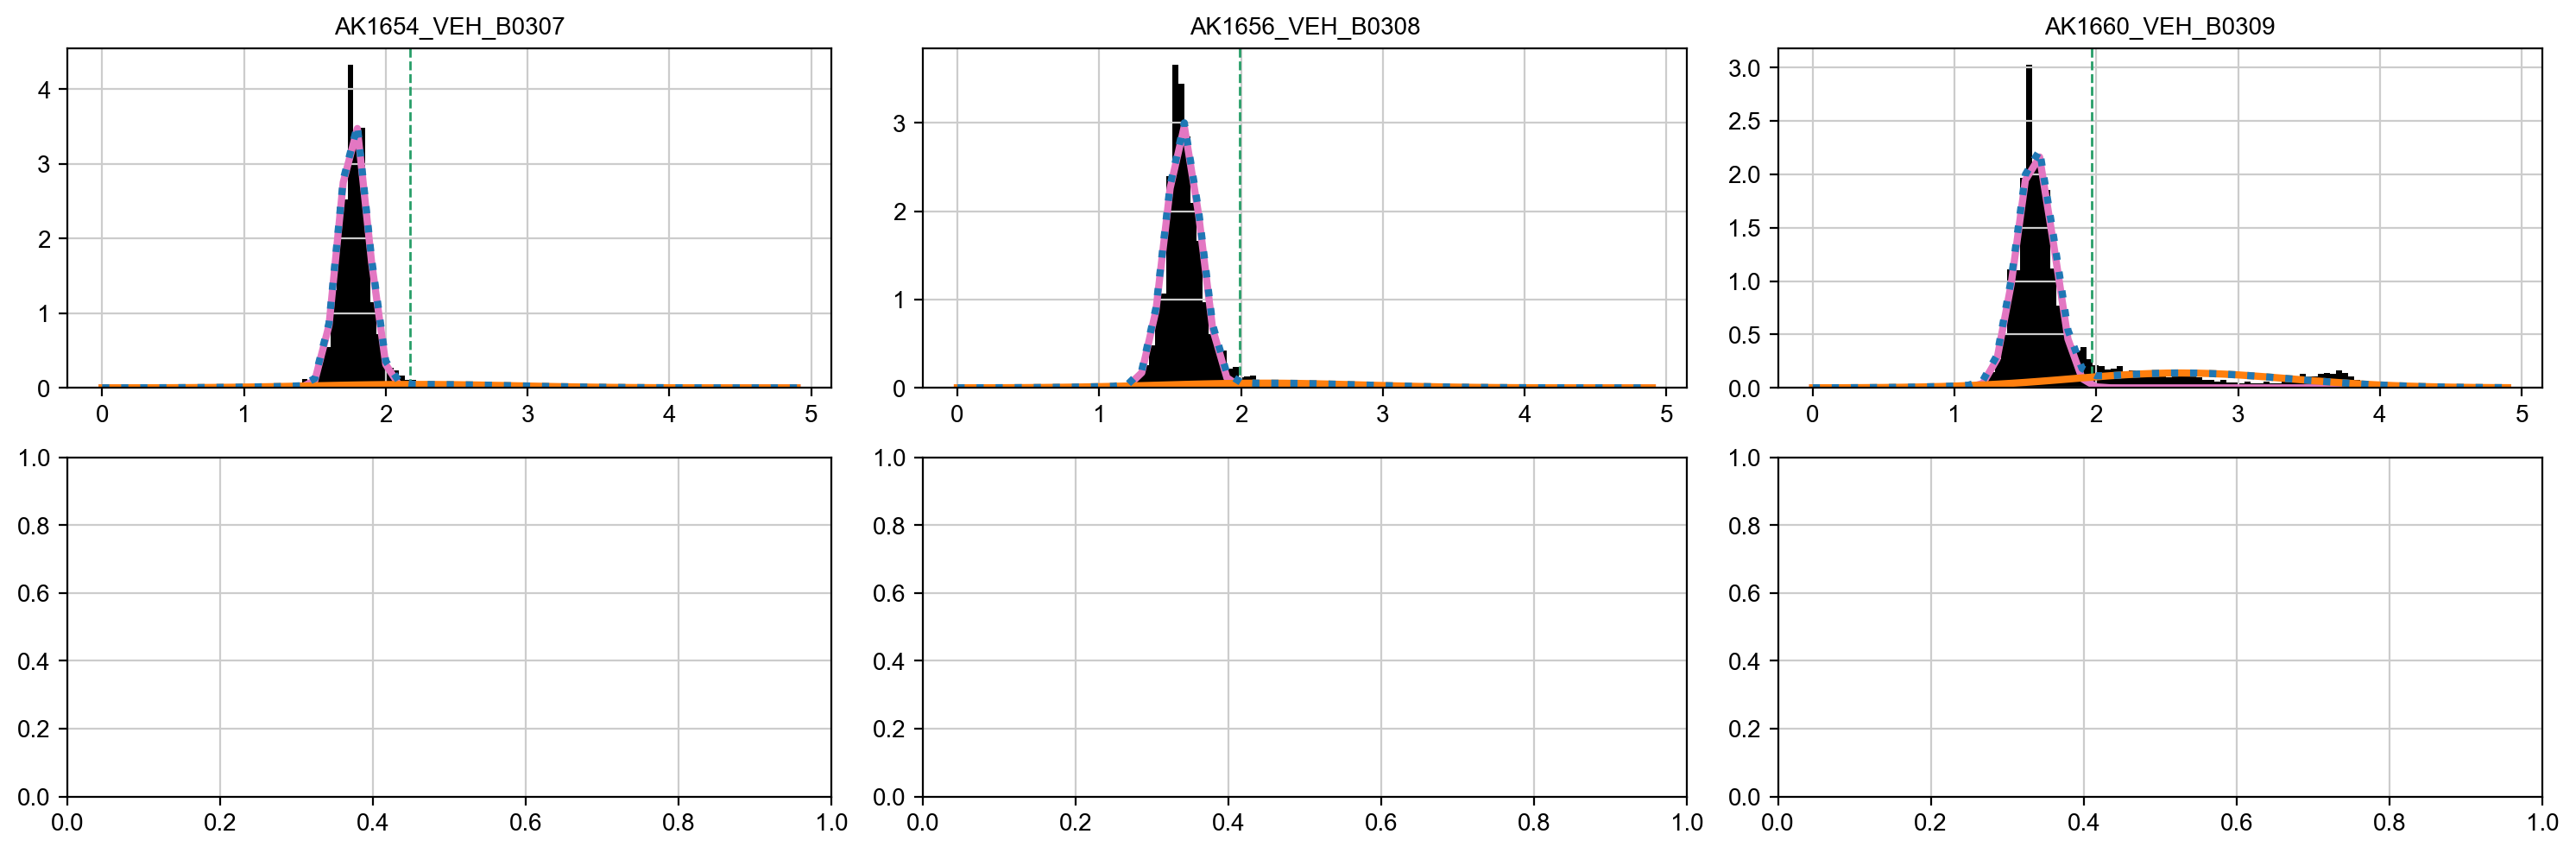

In [61]:
numHashes = len(hashNames)
plotLen = 3
fig, axs = plt.subplots(2,plotLen)
plt.rcParams["figure.figsize"] = (15,5)

dfHashBoundry = pd.DataFrame(np.zeros(numHashes),hashNames, columns=["boundry"])
gmm = GMM(n_components = 2, random_state=10, covariance_type = 'full', n_init=5, means_init=[[1],[4]])
#binEx = np.arange(0.5,10,10/200).reshape(-1,1)

for i, hashName in enumerate(hashNames):
    hashCount = np.array(np.log10(adata.obs[hashName]+1)).reshape(-1, 1)
    fitGMM = gmm.fit(hashCount)
    mean = fitGMM.means_  
    covs  = fitGMM.covariances_
    weights = fitGMM.weights_
    #print(mean)
    binEx = np.arange(min(mean),max(mean),0.1).reshape(-1,1)
    fitGmmBound = fitGMM.predict(binEx)
    #print(fitGmmBound)
    hashBoundry = binEx[np.where(fitGmmBound == 1)[0][0]][0]
    #naiveBoundry = np.log10(int(hashDisc.loc["90%",hashName])+1)
    
    dfHashBoundry.loc[hashName] = hashBoundry
    
    x_axis = np.arange(0, 5, 0.1)
    y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
    y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

    # Plot 2
    x,y = i//plotLen, i%plotLen
    axs[x,y].set_title(hashName)
    #axs[x,y].axvline(naiveBoundry, c='C3', linestyle='dashed', linewidth=1) #red
    axs[x,y].axvline(hashBoundry, c='C2', linestyle='dashed', linewidth=1)  #green
    axs[x,y].hist(hashCount, density=True, color='black', bins=100)        
    axs[x,y].plot(x_axis, y_axis0, lw=3, c='C6')                            #pink
    axs[x,y].plot(x_axis, y_axis1, lw=3, c='C1')                            #orange
    axs[x,y].plot(x_axis, y_axis0+y_axis1, lw=3, c='C0', ls=':')            #dotted blue
    
plt.tight_layout(pad=1.0)
plt.show()

In [62]:
hashIDs = hashCounts.copy()
hashID = np.array(hashNames)
for hashName in hashNames:
    print(hashName)
    print(dfHashBoundry.loc[hashName].values[0])
    hashIDs.loc[:,hashName] = np.log10(hashCounts.loc[:,hashName]+1) > dfHashBoundry.loc[hashName].values[0]
hashIDs

AK1654_VEH_B0307
2.1744029117911383
AK1656_VEH_B0308
1.9899590167751113
AK1660_VEH_B0309
1.9679370376050898


,AK1654_VEH_B0307,AK1656_VEH_B0308,AK1660_VEH_B0309
AAACCCAAGACCAACG-1,False,False,True
AAACCCACAAGAGTTA-1,False,False,False
AAACCCACAGCTCATA-1,False,False,False
AAACCCACATTGTGCA-1,False,False,False
AAACCCAGTCAGCGTC-1,False,False,False
...,...,...,...
TTTGTTGGTAACCAGG-1,False,False,True
TTTGTTGGTCATGACT-1,False,False,False
TTTGTTGGTTCCACAA-1,True,False,False
TTTGTTGTCGTAATGC-1,False,False,True


In [63]:
classification = np.empty(len(adata), dtype="object")
i = 0
for cellBar, hashBool in hashIDs.iterrows():
    numHashes = sum(hashBool)
    if (numHashes == 1):
        classif = hashID[hashBool.values][0]#.values
    elif (numHashes > 1):
        classif = "Doublet"
    else:
        classif = "Negative"
    classification[i] = classif
    i = i + 1

In [64]:
adata.obs["GMM"] = classification
adata.obs["GMM"].value_counts()

Negative            3957
AK1660_VEH_B0309    1164
AK1656_VEH_B0308     270
AK1654_VEH_B0307     161
Doublet               60
Name: GMM, dtype: int64

In [65]:
adata.obs[['AK1654_VEH_B0307', 'AK1656_VEH_B0308', 'AK1660_VEH_B0309']]

,AK1654_VEH_B0307,AK1656_VEH_B0308,AK1660_VEH_B0309
AAACCCAAGACCAACG-1,71.0,37.0,116.0
AAACCCACAAGAGTTA-1,58.0,46.0,33.0
AAACCCACAGCTCATA-1,51.0,38.0,45.0
AAACCCACATTGTGCA-1,86.0,41.0,50.0
AAACCCAGTCAGCGTC-1,57.0,41.0,86.0
...,...,...,...
TTTGTTGGTAACCAGG-1,46.0,32.0,394.0
TTTGTTGGTCATGACT-1,115.0,66.0,68.0
TTTGTTGGTTCCACAA-1,464.0,25.0,39.0
TTTGTTGTCGTAATGC-1,47.0,32.0,127.0


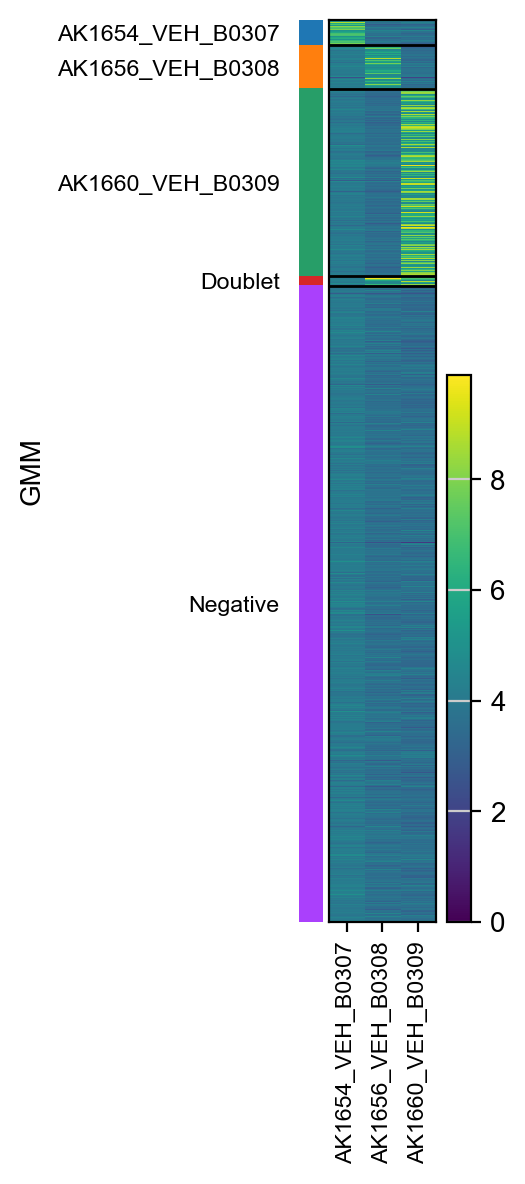

In [66]:
sc.pl.heatmap(adata, ['AK1654_VEH_B0307', 'AK1656_VEH_B0308', 'AK1660_VEH_B0309'], groupby="GMM", log=True)#, save = f"_{figName}_hash.png")

In [67]:
#singlets = [x in hto.var_names for x in adata.obs["Classification"] ]
#adata = adata[singlets,]

In [68]:
sc.pp.normalize_total(adata1,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [69]:
sc.pp.log1p(adata1)

In [70]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [71]:
sc.pp.log1p(adata)

In [72]:
adata = an.concat([adata1,adata], label="treatment", keys=["mrtx","veh"],index_unique="-")
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata

AnnData object with n_obs × n_vars = 16240 × 17519
    obs: 'BFP', 'CLuc', 'CreER', 'DTR', 'EGFP', 'GLuc', 'luciferase', 'mScarlet', 'tdTomato', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'treatment'

In [73]:
resultsFileQC

'write/pdacMouseMrtx_QC.h5ad'

In [74]:
adata.write(resultsFileQC)

In [75]:
sc.read(resultsFileQC)

AnnData object with n_obs × n_vars = 16240 × 17519
    obs: 'BFP', 'CLuc', 'CreER', 'DTR', 'EGFP', 'GLuc', 'luciferase', 'mScarlet', 'tdTomato', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'treatment'